In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
pd.set_option('display.max_rows', 8)
import scipy.stats as stats

from vivarium_public_health.dataset_manager import Artifact
from vivarium_public_health.interactive import initialize_simulation_from_model_specification

!date

Fri Jul 12 12:06:46 PDT 2019


# Check under 5 LRI measures from data artifact

In [2]:
art_path = '/share/costeffectiveness/artifacts/vivarium_conic_sqlns/'

measures = ['incidence', 'cause_specific_mortality', 'excess_mortality', 'prevalence']

In [3]:
def get_measure_from_artifact(measures, location):
    artifact = Artifact(art_path + location + '.hdf')
    
    plt.figure(figsize=(16, 16))
    plt.subplots_adjust(wspace=.3, hspace=.15)
    
    for i, measure in enumerate(measures):
        measure_name = 'cause.lower_respiratory_infections.' + measure
        df = artifact.load(measure_name).stack().reset_index()
        df.rename(columns={'level_6': 'draw', 0: 'value'}, inplace=True)
        df_sub = df.loc[(df.year_start == 2017) & (df.age_group_start <= 1)]
        g = df_sub.groupby(list(df_sub.columns[:-2])).value.describe(percentiles=[.025, .975]).reset_index()
        
        plt.subplot(2, 2, i+1)
        
        for sex in ['Female', 'Male']:
            g_sex = g.loc[g.sex == sex]
            
            plt.plot(g_sex['age_group_start'], g_sex['mean'], '-o', label=sex)
            plt.fill_between(g_sex['age_group_start'], g_sex['2.5%'], g_sex['97.5%'], alpha=0.2)

        plt.xlabel('age_group_start', fontsize=14)
        plt.ylabel(measure, fontsize=14)
        plt.legend(loc=(1.1, 0.0), fontsize=14) if i in [3] else None
        plt.suptitle(f'{location.capitalize()}, LRI', y=0.92, fontsize=18)
        plt.grid()

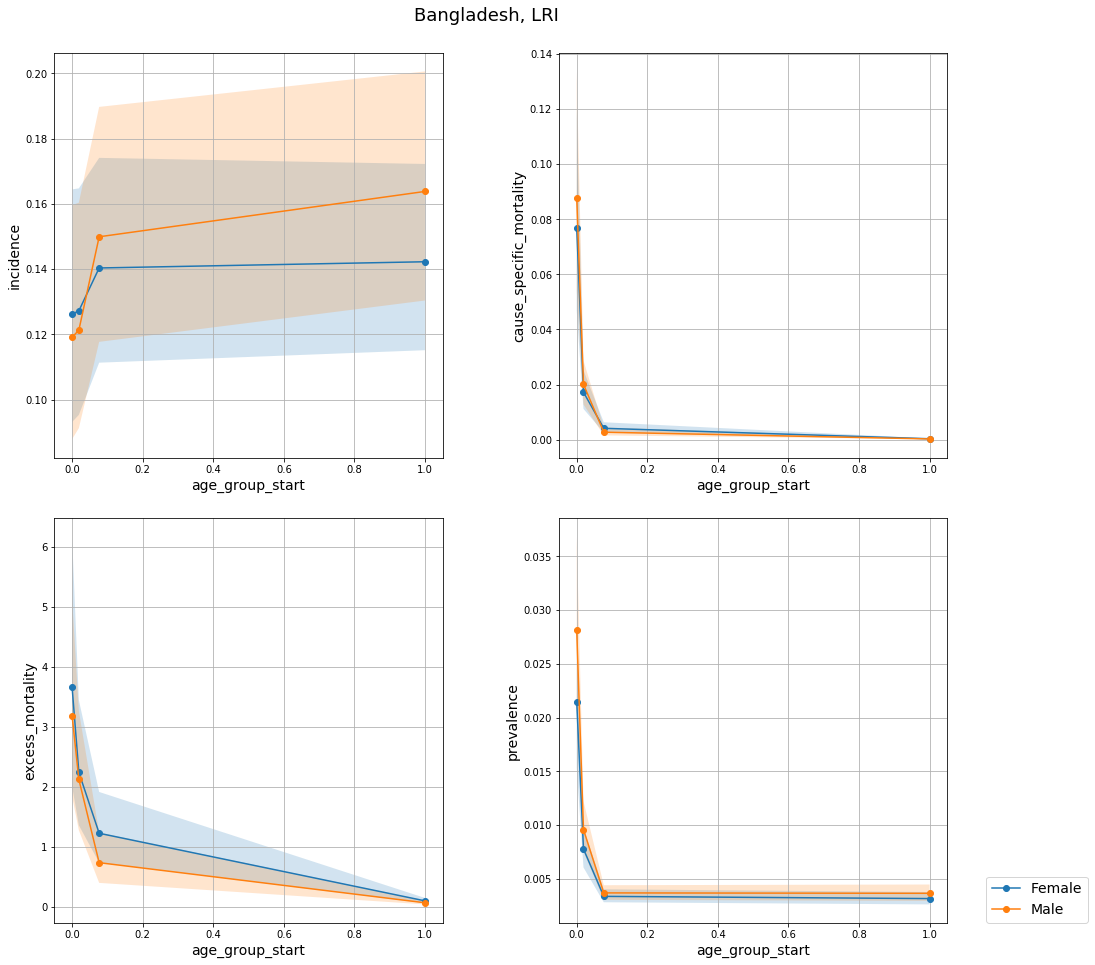

In [4]:
get_measure_from_artifact(measures, 'bangladesh')

# Compare iron deficiency exposure distribution from artifact to sim baseline

In [5]:
model_spec = '/homes/yongqx2/vivarium_conic_sqlns/src/vivarium_conic_sqlns/model_specifications/'

In [6]:
def plot_exposure_distribution(location, sex, age_start, age_end, model_spec):
    # artifact
    art = Artifact(art_path + location + '.hdf', 
                   filter_terms=['draw == 0', 'year_start == 2017', 'age_group_start <= 1'])
    exp_mean = art.load('risk_factor.iron_deficiency.exposure').reset_index()
    exp_sd = art.load('risk_factor.iron_deficiency.exposure_standard_deviation').reset_index()
    
    # sim baseline
    untreated_sim = initialize_simulation_from_model_specification(model_spec + location + '.yaml')
    untreated_sim.setup()
    pop = untreated_sim.get_population()
    pop_sub = pop[(pop.sex == sex) & (pop.age >= age_start) & (pop.age <= age_end)]
    sim_exposure = untreated_sim.get_value('iron_deficiency.exposure')(pop_sub.index)
    
    # compare iron_deficiency exposure distribution
    x = np.linspace(40, 160, 100)
    mu = exp_mean.loc[(exp_mean.sex == sex) & (exp_mean.age_group_start == age_start)].draw_0.values
    sigma = exp_sd.loc[(exp_sd.sex == sex) & (exp_sd.age_group_start == age_start)].draw_0.values
    
    plt.figure(figsize=(10, 8))
    
    sim_exposure.hist(density=True, label='Sim Baseline')
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Artifact')
    plt.xlabel('Hb (g/L)')
    plt.ylabel('Density')
    plt.title(f'Artifact vs. Sim Baseline in {location.capitalize()}, {sex}, {age_start}_to_{age_end}')
    plt.legend(loc=(1.1, 0.0))
    
    plt.show()

/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/vivarium_public_health/population/data_transformations.py:156: FutureWarning: Sorting because non-concatenation axis is not aligned. A future versio

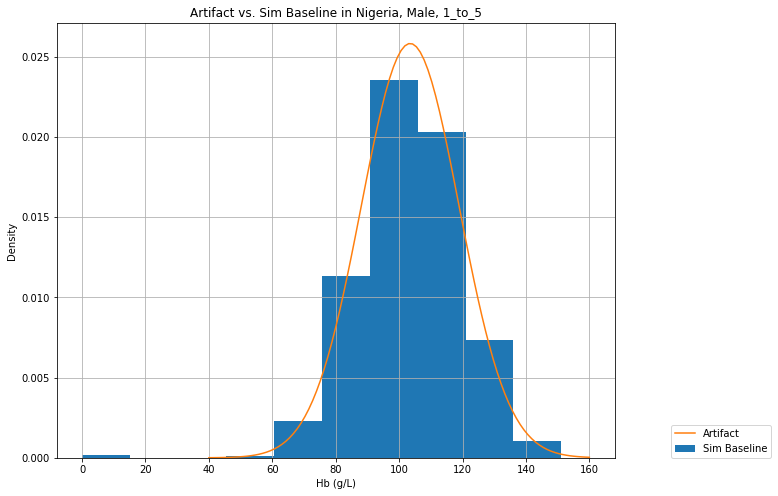

In [7]:
# input age in unit of year
plot_exposure_distribution('nigeria', 'Male', 1, 5, model_spec)

/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/vivarium_public_health/population/data_transformations.py:156: FutureWarning: Sorting because non-concatenation axis is not aligned. A future versio

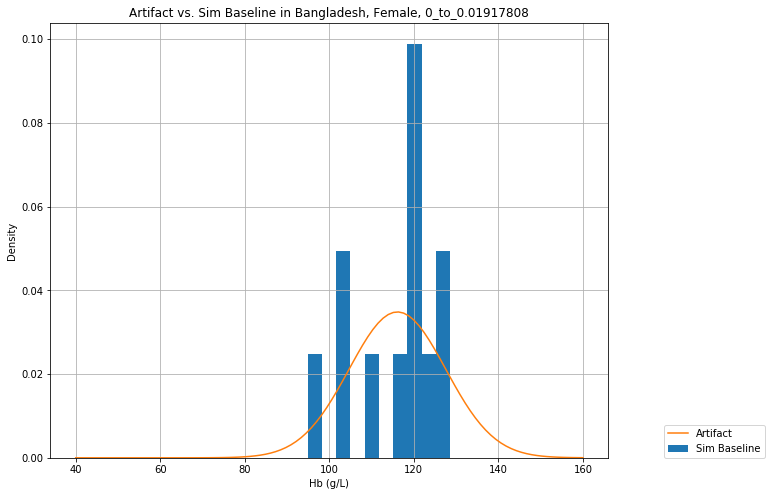

In [8]:
plot_exposure_distribution('bangladesh', 'Female', 0, 0.01917808, model_spec)

/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/risk_distributions/risk_distributions.py:416: RuntimeWarning: overflow encountered in double_scalars
  return (m - mean_guess) ** 2 + (s ** 2 - var_

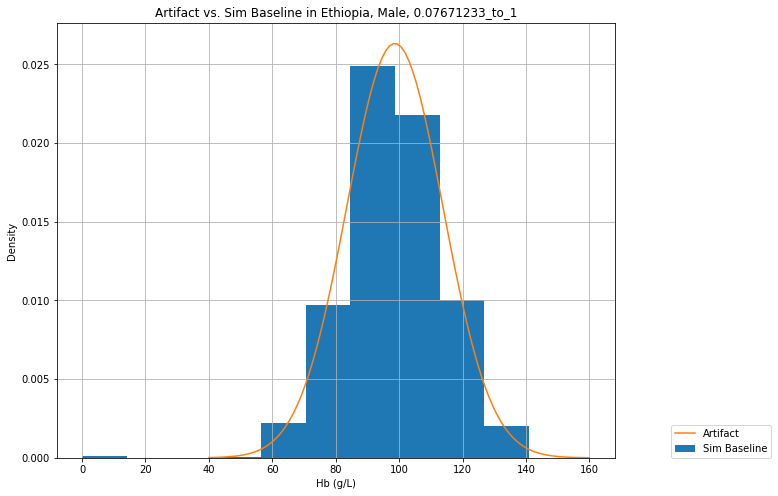

In [9]:
plot_exposure_distribution('ethiopia', 'Male', 0.07671233, 1, model_spec)